In [1]:
#importing the required libraries

!pip install folium
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [2]:
#Loading the dataset
data = pd.read_csv('RTA Dataset.csv')
data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [5]:
#shape of the dataset

data.shape

(12316, 32)

In [6]:
#information about the dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [7]:
# Check for missing values
data.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

In [25]:
#dropping columns which has more than 2500 missing values 

data.drop(['Service_year_of_vehicle','Defect_of_vehicle','Work_of_casuality', 'Fitness_of_casuality'],
        axis = 1, inplace = True)

In [26]:
#storing categorical column names to a new variable

categorical=[i for i in data.columns if data[i].dtype=='O']
print('The categorical variables are',categorical)

The categorical variables are ['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver', 'Educational_level', 'Vehicle_driver_relation', 'Driving_experience', 'Type_of_vehicle', 'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment', 'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions', 'Light_conditions', 'Weather_conditions', 'Type_of_collision', 'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity', 'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity']


In [27]:
#categorical values we can replace the null values with the Mode of it

for i in categorical:
    data[i].fillna(data[i].mode()[0],inplace=True)

In [28]:
#checking the present null values after proper alteration of the dataset

data.isna().sum()

Time                           0
Day_of_week                    0
Age_band_of_driver             0
Sex_of_driver                  0
Educational_level              0
Vehicle_driver_relation        0
Driving_experience             0
Type_of_vehicle                0
Owner_of_vehicle               0
Area_accident_occured          0
Lanes_or_Medians               0
Road_allignment                0
Types_of_Junction              0
Road_surface_type              0
Road_surface_conditions        0
Light_conditions               0
Weather_conditions             0
Type_of_collision              0
Number_of_vehicles_involved    0
Number_of_casualties           0
Vehicle_movement               0
Casualty_class                 0
Sex_of_casualty                0
Age_band_of_casualty           0
Casualty_severity              0
Pedestrian_movement            0
Cause_of_accident              0
Accident_severity              0
dtype: int64

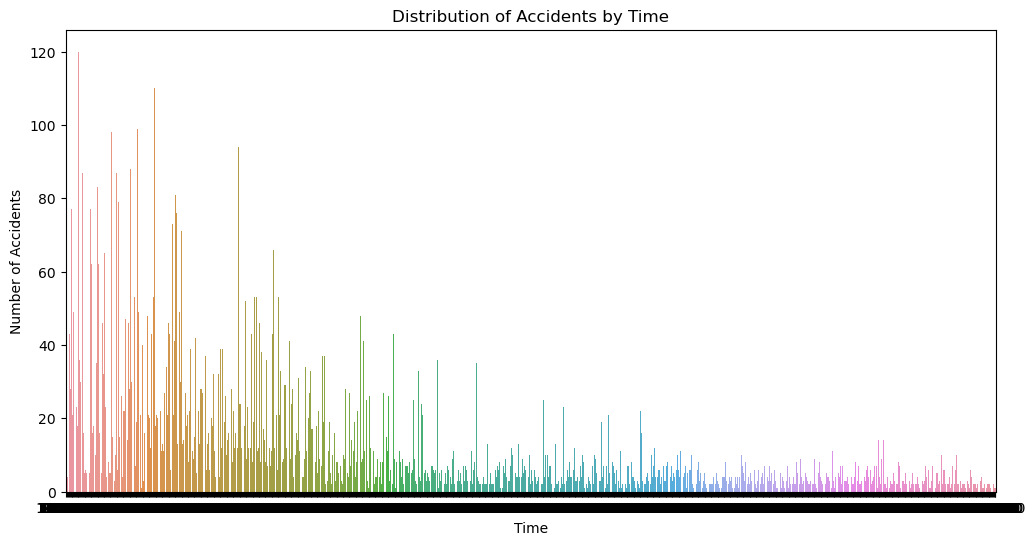

In [34]:
#Distribution of Accidents by Time of Day

plt.figure(figsize=(12, 6))
sns.countplot(x='Time', data=data)
plt.title('Distribution of Accidents by Time')
plt.xlabel('Time')
plt.ylabel('Number of Accidents')
plt.show()

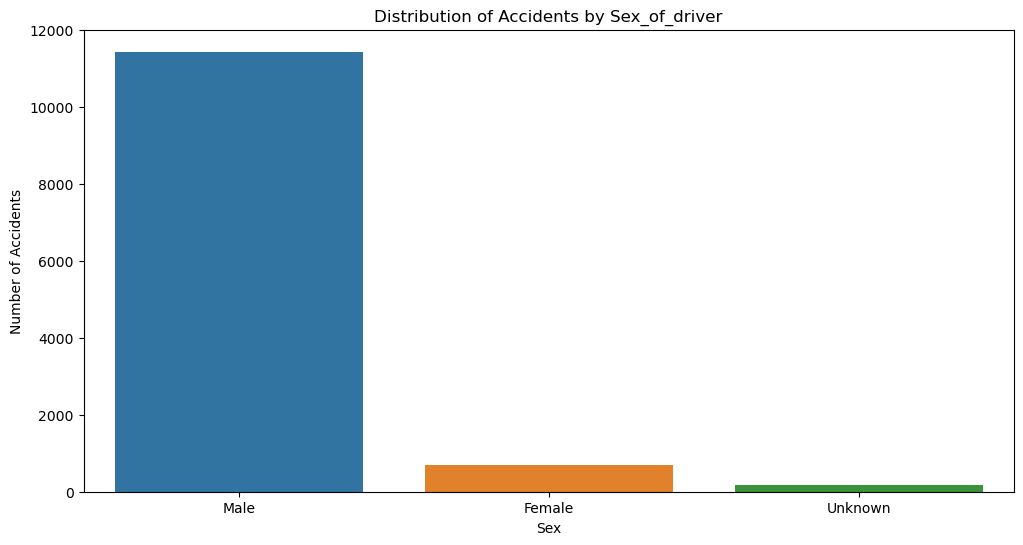

In [33]:

plt.figure(figsize=(12, 6))
sns.countplot(x='Sex_of_driver', data=data)
plt.title('Distribution of Accidents by Sex_of_driver')
plt.xlabel('Sex')
plt.ylabel('Number of Accidents')
plt.show()

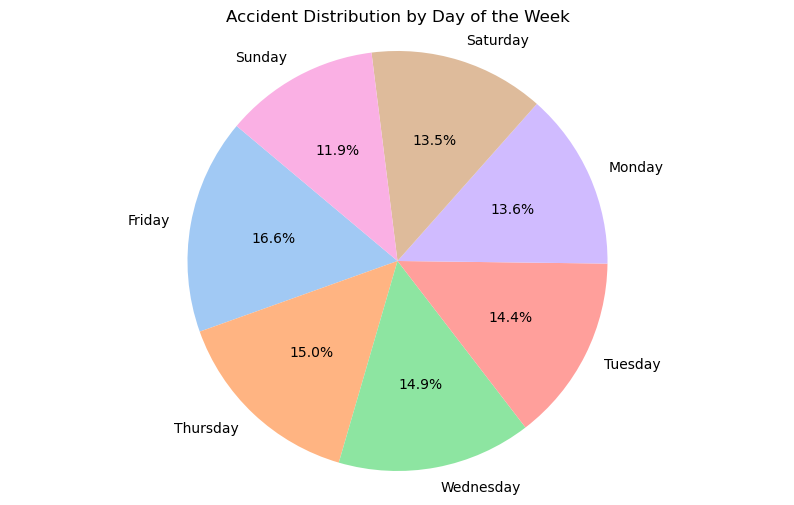

In [42]:
#PIECHART
#accident distribution by days of a week
#Creating a mapping for better readability

day_mapping = {
    'Monday': 'Monday',
    'Tuesday': 'Tuesday',
    'Wednesday': 'Wednesday',
    'Thursday': 'Thursday',
    'Friday': 'Friday',
    'Saturday': 'Saturday',
    'Sunday': 'Sunday'
}
data['Day_of_week'] = data['Day_of_week'].map(day_mapping)


# Counting the number of accidents for each day of the week

day_counts = data['Day_of_week'].value_counts()

# Plotting the pie chart

plt.figure(figsize=(10, 6))
plt.pie(day_counts, labels=day_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Accident Distribution by Day of the Week')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

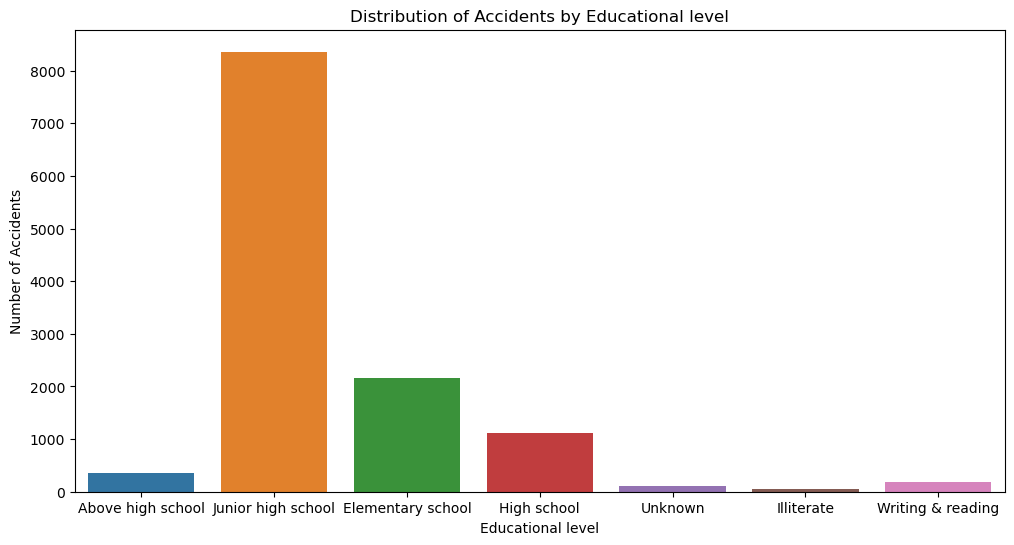

In [43]:
#distribution of accidents by Educational level

plt.figure(figsize=(12, 6))
sns.countplot(x='Educational_level', data=data)
plt.title('Distribution of Accidents by Educational level')
plt.xlabel('Educational level')
plt.ylabel('Number of Accidents')
plt.show()

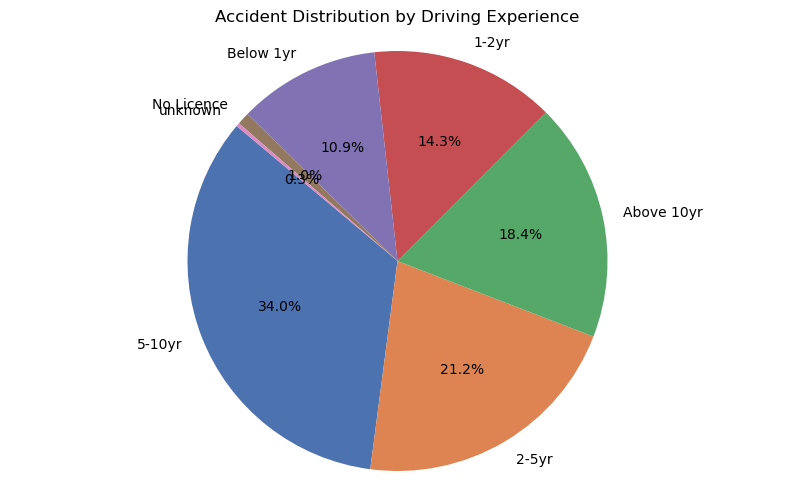

In [48]:
#Accident distribution by Driving experience

# Counting the number of accidents for each day of the week

Driving_experience_counts = data['Driving_experience'].value_counts()

# Plotting the pie chart

plt.figure(figsize=(10, 6))
plt.pie(Driving_experience_counts, labels=Driving_experience_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('deep'))
plt.title('Accident Distribution by Driving Experience')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [7]:
vehicle_movement_acc = data['Vehicle_movement'].value_counts().sort_values(ascending = False).reset_index()
vehicle_movement_acc


,index,Vehicle_movement
0,Going straight,8158
1,Moving Backward,985
2,Other,937
3,Reversing,563
4,Turnover,489
5,Getting off,339
6,Entering a junction,193
7,Overtaking,96
8,Unknown,88
9,Stopping,61


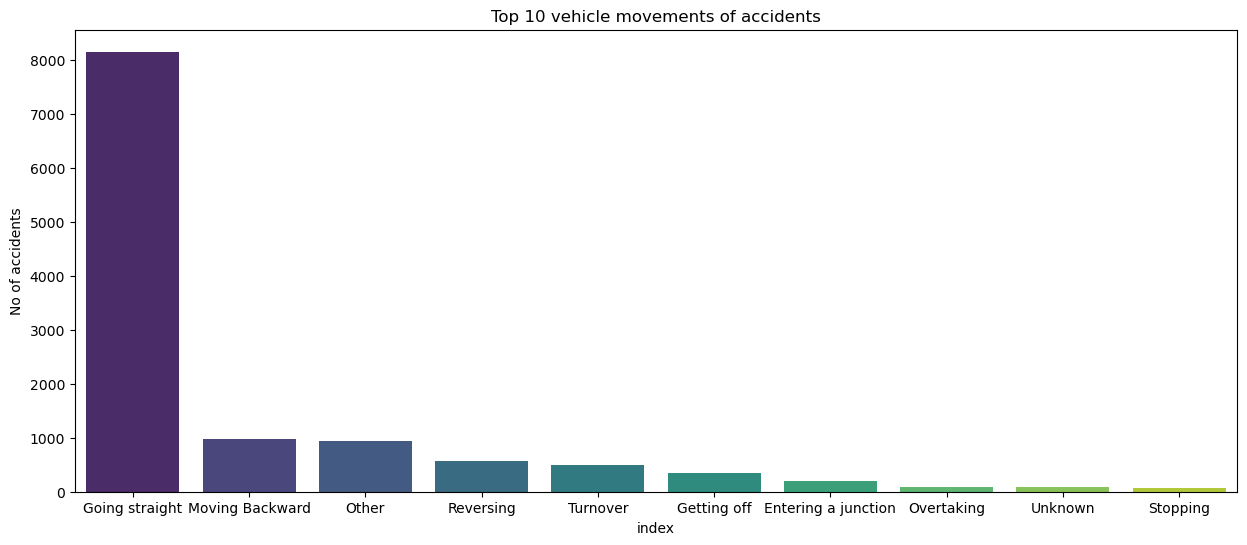

In [11]:
#Top 10 vehicle movements due to which accidents are caused

plt.figure(figsize=(15,6))
sns.barplot(x='index',y='Vehicle_movement',data= vehicle_movement_acc.head(10),palette='viridis')
plt.title("Top 10 vehicle movements of accidents")
plt.ylabel("No of accidents")
plt.show()

In [12]:
data['Casualty_severity'].value_counts().index

Index(['3', 'na', '2', '1'], dtype='object')

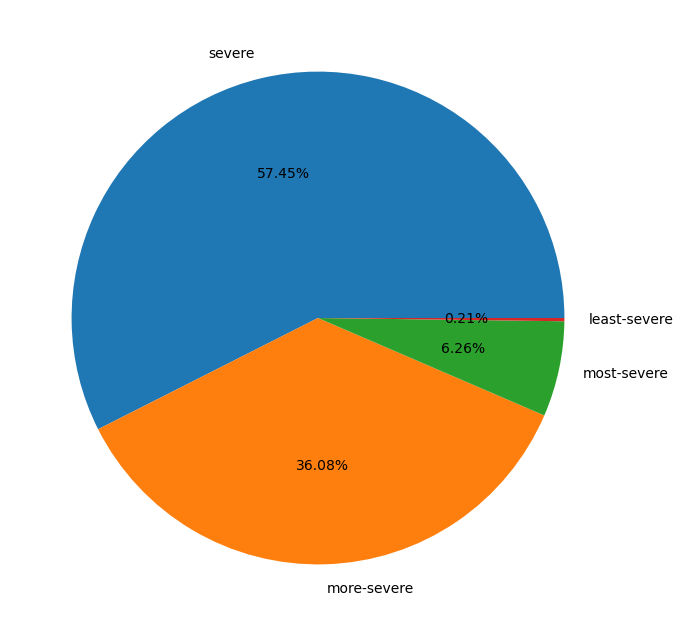

In [14]:
plt.figure(figsize=(8,8))
plt.pie(data['Casualty_severity'].value_counts(),labels=['severe','more-severe','most-severe','least-severe'],autopct="%1.2f%%")
plt.show()

In [16]:
data['Cause_of_accident'].value_counts().index


Index(['No distancing', 'Changing lane to the right',
       'Changing lane to the left', 'Driving carelessly',
       'No priority to vehicle', 'Moving Backward',
       'No priority to pedestrian', 'Other', 'Overtaking',
       'Driving under the influence of drugs', 'Driving to the left',
       'Getting off the vehicle improperly', 'Driving at high speed',
       'Overturning', 'Turnover', 'Overspeed', 'Overloading', 'Drunk driving',
       'Unknown', 'Improper parking'],
      dtype='object')

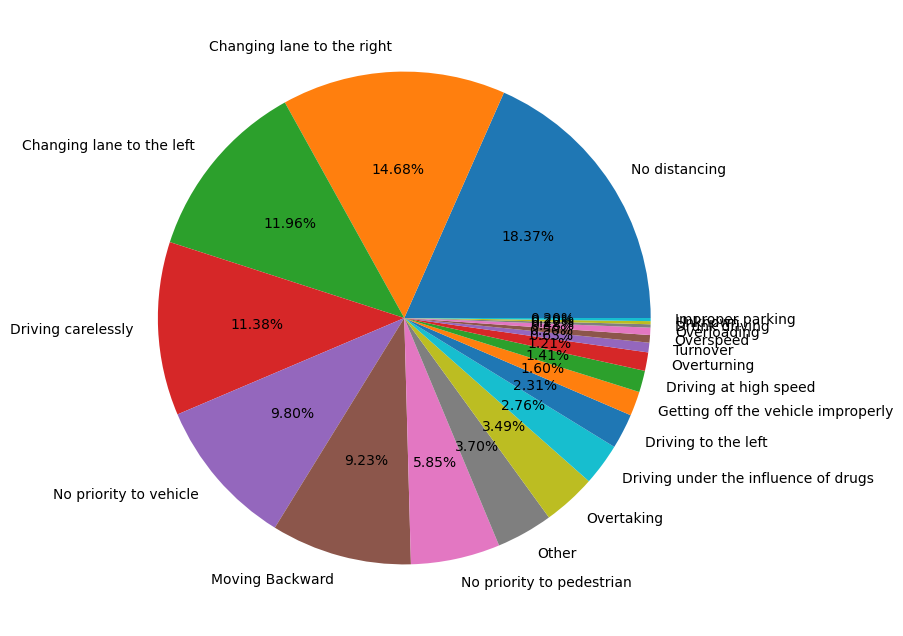

In [18]:
#pie chart representing the causes of the accidents

plt.figure(figsize=(8,8))
plt.pie(data['Cause_of_accident'].value_counts(),labels=['No distancing', 'Changing lane to the right',
       'Changing lane to the left', 'Driving carelessly',
       'No priority to vehicle', 'Moving Backward',
       'No priority to pedestrian', 'Other', 'Overtaking',
       'Driving under the influence of drugs', 'Driving to the left',
       'Getting off the vehicle improperly', 'Driving at high speed',
       'Overturning', 'Turnover', 'Overspeed', 'Overloading', 'Drunk driving',
       'Unknown', 'Improper parking'],autopct="%1.2f%%")
plt.show()

<Axes: xlabel='Number_of_casualties', ylabel='Number_of_vehicles_involved'>

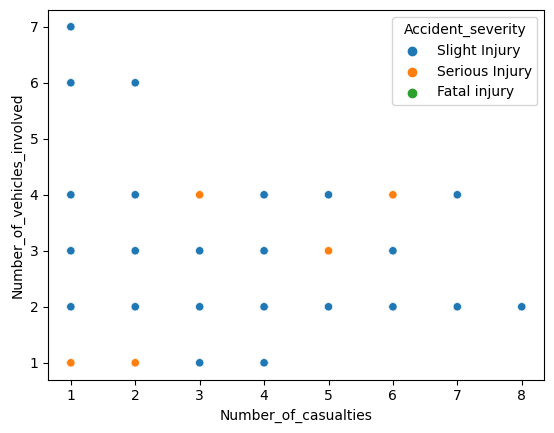

In [50]:
#plotting relationship between Number_of_casualties and Number_of_vehicles_involved

sns.scatterplot(x=data['Number_of_casualties'], y=data['Number_of_vehicles_involved'], hue=data['Accident_severity'])

In [20]:
#CORRELATION ANALYSIS
#Droping non-numeric columns for correlation analysis

numeric_data = data.select_dtypes(include=[float, int])

In [21]:
#Computing the correlation matrix

correlation_matrix = numeric_data.corr(numeric_only=True)

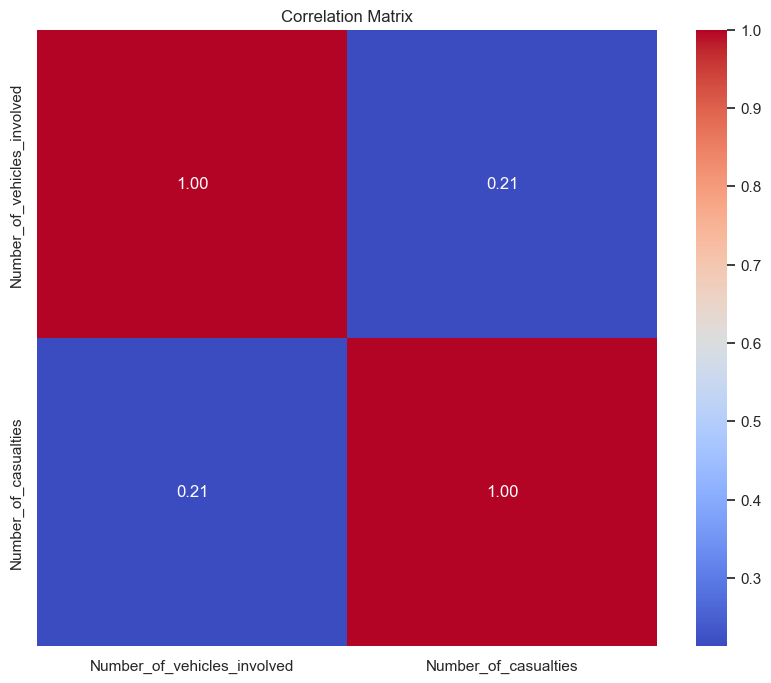

In [22]:
#Ploting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()